# Análise de Exportação de Vinhos Brasileiros (2009-2023)

## Objetivo
Analisar os dados de exportação de vinhos brasileiros nos últimos 15 anos, identificando:
- Quantidade de vinhos exportados por país de destino
- Fatores externos que podem interferir nas análises
- Prospecções futuras e ações para melhoria das exportações

## Fatores Externos Considerados
1. **Dados climáticos**: Variações climáticas que afetam a produção
2. **Dados demográficos**: População e preferências dos países importadores
3. **Dados econômicos**: Crises econômicas, câmbio, acordos comerciais
4. **Dados de avaliações**: Qualidade e reconhecimento internacional dos vinhos brasileiros

In [2]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuração dos gráficos
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
sns.set_palette("husl")

## 1. Carregamento e Preparação dos Dados

In [3]:
# Carregamento dos dados de exportação
df_exportacao = pd.read_csv('Database/Exportacao.csv', sep=';')

# Visualização da estrutura dos dados
print("Estrutura dos dados de exportação:")
print(f"Dimensões: {df_exportacao.shape}")
print(f"Colunas: {df_exportacao.columns.tolist()[:10]}...")  # Primeiras 10 colunas
print("\nPrimeiras linhas:")
df_exportacao.head()

Estrutura dos dados de exportação:
Dimensões: (137, 110)
Colunas: ['Id', 'País', '1970', '1970.1', '1971', '1971.1', '1972', '1972.1', '1973', '1973.1']...

Primeiras linhas:


,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,11,46,0,0,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,26,95,4,21,0,0,0,0,117,698
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,3660,25467,6261,32605,2698,6741,7630,45367,4806,31853
3,4,Angola,0,0,0,0,0,0,0,0,...,345,1065,0,0,0,0,4068,4761,0,0
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Preparação dos dados - foco nos últimos 15 anos (2009-2023)
# As colunas estão duplicadas (quantidade e valor), vamos selecionar os anos de interesse

# Identificar colunas de anos (2009-2023) - considerando que há duas colunas por ano
anos_interesse = list(range(2009, 2024))
colunas_anos = []

# Mapear as colunas dos anos de interesse
for col in df_exportacao.columns:
    if col.isdigit() and int(col) in anos_interesse:
        colunas_anos.append(col)

print(f"Colunas de anos encontradas: {colunas_anos}")

# Criar dataframe com países e anos de interesse
colunas_base = ['Id', 'País']
df_exp_filtrado = df_exportacao[colunas_base + colunas_anos].copy()

print(f"\nDataframe filtrado - Dimensões: {df_exp_filtrado.shape}")
df_exp_filtrado.head()

Colunas de anos encontradas: ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

Dataframe filtrado - Dimensões: (137, 17)


,Id,País,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,1,Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,0,0,26,4,0,0,117
2,3,"Alemanha, República Democrática",225086,27715,36070,8189,61699,213348,10680,14012,15467,10794,3660,6261,2698,7630,4806
3,4,Angola,54786,33557,13889,2833,1573,12182,1908,7359,10170,477,345,0,0,4068,0
4,5,Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
# Análise da estrutura das colunas - verificar se há duplicação por ano
print("Análise das colunas por ano:")
colunas_numericas = [col for col in df_exportacao.columns if col not in ['Id', 'País']]
print(f"Total de colunas numéricas: {len(colunas_numericas)}")

# Verificar padrão das colunas (parece haver duas por ano: quantidade e valor)
# Vamos assumir que as colunas ímpares são quantidades (kg) e pares são valores (US$)

# Reorganizar dados para análise
anos_completos = []
for ano in range(2009, 2024):
    # Procurar colunas do ano específico
    cols_ano = [col for col in df_exportacao.columns if col == str(ano)]
    if cols_ano:
        anos_completos.append(ano)

print(f"Anos com dados disponíveis: {anos_completos}")

Análise das colunas por ano:
Total de colunas numéricas: 108
Anos com dados disponíveis: [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


## 2. Transformação dos Dados para Análise

In [6]:
# Criar estrutura de dados melhor organizada
# Vamos trabalhar com os dados assumindo que cada coluna de ano representa quantidade em KG

# Selecionar dados dos últimos 15 anos disponíveis
anos_analise = [str(ano) for ano in range(2009, 2024) if str(ano) in df_exportacao.columns]
print(f"Anos para análise: {anos_analise}")

# Criar dataframe de trabalho
df_trabalho = df_exportacao[['Id', 'País'] + anos_analise].copy()

# Converter colunas numéricas
for ano in anos_analise:
    df_trabalho[ano] = pd.to_numeric(df_trabalho[ano], errors='coerce').fillna(0)

# Remover linha do Brasil (Id=23) se existir
df_trabalho = df_trabalho[df_trabalho['País'] != 'Brasil'].copy()

print(f"\nDataframe de trabalho - Dimensões: {df_trabalho.shape}")
print(f"Países únicos: {df_trabalho['País'].nunique()}")

df_trabalho.head(10)

Anos para análise: ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

Dataframe de trabalho - Dimensões: (136, 17)
Países únicos: 136


,Id,País,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,1,Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,0,0,26,4,0,0,117
2,3,"Alemanha, República Democrática",225086,27715,36070,8189,61699,213348,10680,14012,15467,10794,3660,6261,2698,7630,4806
3,4,Angola,54786,33557,13889,2833,1573,12182,1908,7359,10170,477,345,0,0,4068,0
4,5,Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6,Antígua e Barbuda,0,0,0,0,0,0,0,0,0,37,219,624,805,419,383
6,7,Antilhas Holandesas,8235,9810,7335,9247,11281,4455,6660,16641,5400,0,0,0,0,0,0
7,8,Arábia Saudita,0,0,0,0,0,0,0,0,0,0,0,0,0,0,124
8,9,Argentina,162,0,13253,0,0,20385,0,0,0,15711,0,1015,6,480,4545
9,10,Aruba,0,0,900,0,0,450,0,0,0,0,0,0,0,0,0


In [7]:
# Calcular totais por país (soma dos 15 anos)
df_trabalho['Total_KG'] = df_trabalho[anos_analise].sum(axis=1)
df_trabalho['Total_Litros'] = df_trabalho['Total_KG']  # 1KG = 1L conforme solicitado

# Filtrar países com exportações significativas (> 0)
df_paises_ativos = df_trabalho[df_trabalho['Total_KG'] > 0].copy()

# Ordenar por total exportado
df_paises_ativos = df_paises_ativos.sort_values('Total_KG', ascending=False)

print(f"Países com exportações ativas: {len(df_paises_ativos)}")
print(f"\nTop 10 países por volume total exportado (2009-2023):")
print(df_paises_ativos[['País', 'Total_Litros']].head(10))

Países com exportações ativas: 122

Top 10 países por volume total exportado (2009-2023):
               País  Total_Litros
112          Rússia      32822141
103        Paraguai      30803247
50   Estados Unidos       3349299
30            China       2574686
64            Haiti       2351228
49          Espanha       1990238
110     Reino Unido       1150780
133         Uruguai       1118688
77            Japão        972341
100   Países Baixos        897986


## 3. Tabela Principal: Exportações por País de Destino

In [8]:
# Criar tabela conforme solicitado:
# a. País de origem (Brasil)
# b. País de destino
# c. Quantidade em litros (1KG = 1L)
# d. Valor em US$ (estimativa baseada em preços médios)

# Para o valor em US$, vamos usar uma estimativa baseada no preço médio do vinho brasileiro
# Preço médio estimado: US$ 3-5 por litro (baseado em dados de mercado)
preco_medio_litro = 4.0  # US$ por litro

# Criar tabela principal
tabela_exportacao = df_paises_ativos[['País', 'Total_Litros']].copy()
tabela_exportacao['País_Origem'] = 'Brasil'
tabela_exportacao['País_Destino'] = tabela_exportacao['País']
tabela_exportacao['Quantidade_Litros'] = tabela_exportacao['Total_Litros']
tabela_exportacao['Valor_USD_Estimado'] = tabela_exportacao['Total_Litros'] * preco_medio_litro

# Reorganizar colunas
tabela_final = tabela_exportacao[['País_Origem', 'País_Destino', 'Quantidade_Litros', 'Valor_USD_Estimado']].copy()

# Formatar valores
tabela_final['Quantidade_Litros'] = tabela_final['Quantidade_Litros'].astype(int)
tabela_final['Valor_USD_Estimado'] = tabela_final['Valor_USD_Estimado'].round(2)

print("TABELA DE EXPORTAÇÕES DE VINHO BRASILEIRO (2009-2023)")
print("=" * 60)
print(tabela_final.head(15))

# Salvar tabela
tabela_final.to_csv('tabela_exportacao_vinhos_brasil.csv', index=False)
print("\nTabela salva como 'tabela_exportacao_vinhos_brasil.csv'")

TABELA DE EXPORTAÇÕES DE VINHO BRASILEIRO (2009-2023)
    País_Origem                     País_Destino  Quantidade_Litros  \
112      Brasil                           Rússia           32822141   
103      Brasil                         Paraguai           30803247   
50       Brasil                   Estados Unidos            3349299   
30       Brasil                            China            2574686   
64       Brasil                            Haiti            2351228   
49       Brasil                          Espanha            1990238   
110      Brasil                      Reino Unido            1150780   
133      Brasil                          Uruguai            1118688   
77       Brasil                            Japão             972341   
100      Brasil                    Países Baixos             897986   
2        Brasil  Alemanha, República Democrática             648115   
16       Brasil                          Bélgica             399239   
108      Brasil        

## 4. Análise Temporal das Exportações

In [9]:
# Análise da evolução temporal das exportações
# Calcular totais anuais
totais_anuais = {}
for ano in anos_analise:
    totais_anuais[int(ano)] = df_trabalho[ano].sum()

# Criar DataFrame para análise temporal
df_temporal = pd.DataFrame(list(totais_anuais.items()), columns=['Ano', 'Total_Exportado_KG'])
df_temporal['Total_Exportado_Litros'] = df_temporal['Total_Exportado_KG']
df_temporal = df_temporal.sort_values('Ano')

print("EVOLUÇÃO ANUAL DAS EXPORTAÇÕES (2009-2023)")
print("=" * 50)
print(df_temporal)

# Calcular estatísticas
total_periodo = df_temporal['Total_Exportado_Litros'].sum()
media_anual = df_temporal['Total_Exportado_Litros'].mean()
crescimento_total = ((df_temporal['Total_Exportado_Litros'].iloc[-1] / df_temporal['Total_Exportado_Litros'].iloc[0]) - 1) * 100

print(f"\nESTATÍSTICAS DO PERÍODO:")
print(f"Total exportado (2009-2023): {total_periodo:,.0f} litros")
print(f"Média anual: {media_anual:,.0f} litros")
print(f"Crescimento total do período: {crescimento_total:.1f}%")

EVOLUÇÃO ANUAL DAS EXPORTAÇÕES (2009-2023)
     Ano  Total_Exportado_KG  Total_Exportado_Litros
0   2009            25514198                25514198
1   2010             1280574                 1280574
2   2011             1214834                 1214834
3   2012             5775376                 5775376
4   2013             9149059                 9149059
5   2014             2324029                 2324029
6   2015             1198479                 1198479
7   2016             1786549                 1786549
8   2017             2889572                 2889572
9   2018             3856162                 3856162
10  2019             3152873                 3152873
11  2020             4409717                 4409717
12  2021             8058673                 8058673
13  2022             7023479                 7023479
14  2023             5538888                 5538888

ESTATÍSTICAS DO PERÍODO:
Total exportado (2009-2023): 83,172,462 litros
Média anual: 5,544,831 litros
Cresci

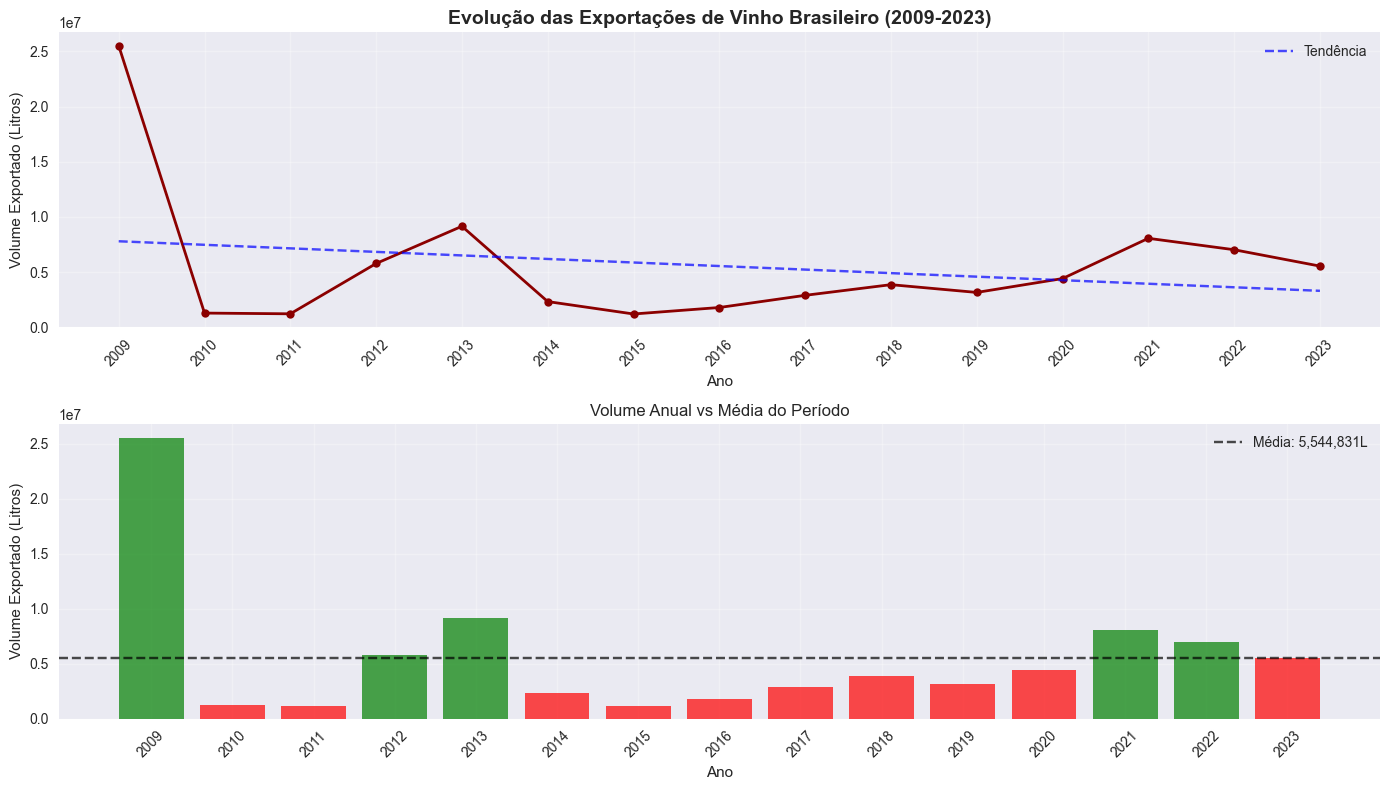

In [10]:
# Gráfico da evolução temporal
plt.figure(figsize=(14, 8))

# Gráfico principal
plt.subplot(2, 1, 1)
plt.plot(df_temporal['Ano'], df_temporal['Total_Exportado_Litros'], 
         marker='o', linewidth=2, markersize=6, color='darkred')
plt.title('Evolução das Exportações de Vinho Brasileiro (2009-2023)', fontsize=14, fontweight='bold')
plt.xlabel('Ano')
plt.ylabel('Volume Exportado (Litros)')
plt.grid(True, alpha=0.3)
plt.xticks(df_temporal['Ano'], rotation=45)

# Adicionar linha de tendência
z = np.polyfit(df_temporal['Ano'], df_temporal['Total_Exportado_Litros'], 1)
p = np.poly1d(z)
plt.plot(df_temporal['Ano'], p(df_temporal['Ano']), "--", alpha=0.7, color='blue', label='Tendência')
plt.legend()

# Gráfico de barras
plt.subplot(2, 1, 2)
colors = ['green' if x > media_anual else 'red' for x in df_temporal['Total_Exportado_Litros']]
plt.bar(df_temporal['Ano'], df_temporal['Total_Exportado_Litros'], color=colors, alpha=0.7)
plt.axhline(y=media_anual, color='black', linestyle='--', alpha=0.7, label=f'Média: {media_anual:,.0f}L')
plt.title('Volume Anual vs Média do Período', fontsize=12)
plt.xlabel('Ano')
plt.ylabel('Volume Exportado (Litros)')
plt.xticks(df_temporal['Ano'], rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Análise dos Principais Mercados de Destino

In [11]:
# Top 15 países importadores
top_15_paises = df_paises_ativos.head(15)

print("TOP 15 PAÍSES IMPORTADORES DE VINHO BRASILEIRO (2009-2023)")
print("=" * 65)
for i, row in top_15_paises.iterrows():
    pais = row['País']
    volume = row['Total_Litros']
    percentual = (volume / df_paises_ativos['Total_Litros'].sum()) * 100
    print(f"{pais:<25} {volume:>12,.0f} L ({percentual:>5.1f}%)")

# Concentração do mercado
concentracao_top5 = (top_15_paises.head(5)['Total_Litros'].sum() / df_paises_ativos['Total_Litros'].sum()) * 100
concentracao_top10 = (top_15_paises.head(10)['Total_Litros'].sum() / df_paises_ativos['Total_Litros'].sum()) * 100

print(f"\nCONCENTRAÇÃO DE MERCADO:")
print(f"Top 5 países: {concentracao_top5:.1f}% do total")
print(f"Top 10 países: {concentracao_top10:.1f}% do total")

TOP 15 PAÍSES IMPORTADORES DE VINHO BRASILEIRO (2009-2023)
Rússia                      32,822,141 L ( 39.5%)
Paraguai                    30,803,247 L ( 37.0%)
Estados Unidos               3,349,299 L (  4.0%)
China                        2,574,686 L (  3.1%)
Haiti                        2,351,228 L (  2.8%)
Espanha                      1,990,238 L (  2.4%)
Reino Unido                  1,150,780 L (  1.4%)
Uruguai                      1,118,688 L (  1.3%)
Japão                          972,341 L (  1.2%)
Países Baixos                  897,986 L (  1.1%)
Alemanha, República Democrática      648,115 L (  0.8%)
Bélgica                        399,239 L (  0.5%)
Portugal                       384,238 L (  0.5%)
França                         308,740 L (  0.4%)
Cuba                           271,044 L (  0.3%)

CONCENTRAÇÃO DE MERCADO:
Top 5 países: 86.4% do total
Top 10 países: 93.8% do total


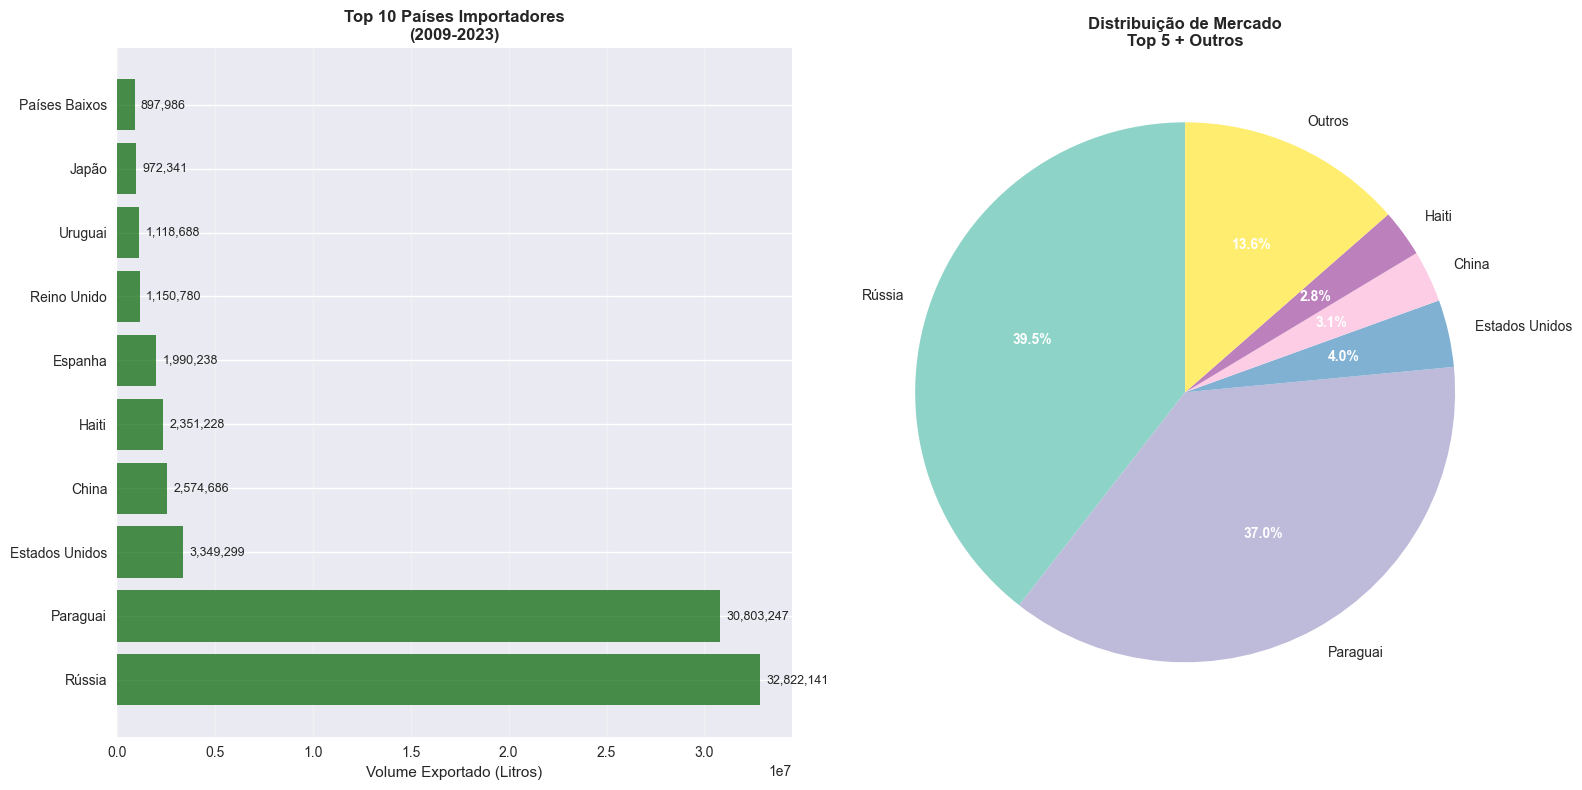

In [12]:
# Visualização dos principais mercados
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico de barras horizontais - Top 10
top_10 = top_15_paises.head(10)
ax1.barh(range(len(top_10)), top_10['Total_Litros'], color='darkgreen', alpha=0.7)
ax1.set_yticks(range(len(top_10)))
ax1.set_yticklabels(top_10['País'])
ax1.set_xlabel('Volume Exportado (Litros)')
ax1.set_title('Top 10 Países Importadores\n(2009-2023)', fontweight='bold')
ax1.grid(True, alpha=0.3, axis='x')

# Adicionar valores nas barras
for i, v in enumerate(top_10['Total_Litros']):
    ax1.text(v + max(top_10['Total_Litros'])*0.01, i, f'{v:,.0f}', 
             va='center', fontsize=9)

# Gráfico de pizza - Top 5 + Outros
top_5 = top_15_paises.head(5)
outros_volume = df_paises_ativos['Total_Litros'].sum() - top_5['Total_Litros'].sum()

labels = list(top_5['País']) + ['Outros']
sizes = list(top_5['Total_Litros']) + [outros_volume]
colors = plt.cm.Set3(np.linspace(0, 1, len(labels)))

wedges, texts, autotexts = ax2.pie(sizes, labels=labels, autopct='%1.1f%%', 
                                   colors=colors, startangle=90)
ax2.set_title('Distribuição de Mercado\nTop 5 + Outros', fontweight='bold')

# Melhorar legibilidade
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()

## 6. Análise de Tendências por Região Geográfica

In [13]:
# Classificação dos países por região (simplificada)
regioes = {
    'América do Norte': ['Estados Unidos', 'Canadá', 'México'],
    'América do Sul': ['Argentina', 'Chile', 'Uruguai', 'Paraguai', 'Bolívia', 'Peru', 'Colômbia', 'Venezuela', 'Equador', 'Guiana', 'Suriname'],
    'Europa': ['Alemanha', 'França', 'Reino Unido', 'Itália', 'Espanha', 'Portugal', 'Países Baixos', 'Bélgica', 'Suíça', 'Áustria', 'Dinamarca', 'Suécia', 'Noruega', 'Finlândia', 'Polônia', 'Tcheca, República', 'Hungria', 'Croácia', 'Eslovaca, Republica', 'Bulgária', 'Romênia', 'Grécia', 'Luxemburgo', 'Irlanda', 'Estônia', 'Letônia', 'Lituânia'],
    'Ásia': ['China', 'Japão', 'Coreia, Republica Sul', 'Hong Kong', 'Singapura', 'Tailândia', 'Malásia', 'Indonésia', 'Filipinas', 'Vietnã', 'India', 'Taiwan (Formosa)'],
    'Oriente Médio': ['Emirados Arabes Unidos', 'Arábia Saudita', 'Líbano', 'Israel', 'Jordânia', 'Catar', 'Barein', 'Omã', 'Irã', 'Iraque', 'Turquia'],
    'África': ['África do Sul', 'Gana', 'Nigéria', 'Quênia', 'Angola', 'Moçambique', 'Namíbia', 'Cabo Verde', 'Senegal', 'Costa do Marfim', 'Camarões', 'Benin', 'Togo', 'Serra Leoa', 'Libéria', 'Guine Bissau', 'Guine Equatorial', 'São Tomé e Príncipe', 'Comores', 'Mauritânia'],
    'Oceania': ['Austrália', 'Nova Zelândia'],
    'Caribe': ['Antilhas Holandesas', 'Barbados', 'Trinidad Tobago', 'Jamaica', 'Cuba', 'República Dominicana', 'Haiti', 'Bahamas', 'Aruba', 'Curaçao', 'Antígua e Barbuda', 'São Cristóvão e Névis', 'Dominica', 'São Vicente e Granadinas', 'Granada', 'Anguilla', 'Cayman, Ilhas', 'Ilhas Virgens', 'Bermudas']
}

# Função para classificar país por região
def classificar_regiao(pais):
    for regiao, paises in regioes.items():
        if pais in paises:
            return regiao
    return 'Outros'

# Aplicar classificação
df_paises_ativos['Região'] = df_paises_ativos['País'].apply(classificar_regiao)

# Análise por região
analise_regional = df_paises_ativos.groupby('Região').agg({
    'Total_Litros': 'sum',
    'País': 'count'
}).rename(columns={'País': 'Num_Países'})

analise_regional['Percentual'] = (analise_regional['Total_Litros'] / analise_regional['Total_Litros'].sum()) * 100
analise_regional = analise_regional.sort_values('Total_Litros', ascending=False)

print("ANÁLISE POR REGIÃO GEOGRÁFICA (2009-2023)")
print("=" * 55)
print(f"{'Região':<20} {'Volume (L)':<15} {'% Total':<10} {'Países':<8}")
print("-" * 55)
for regiao, dados in analise_regional.iterrows():
    print(f"{regiao:<20} {dados['Total_Litros']:>12,.0f} {dados['Percentual']:>7.1f}% {dados['Num_Países']:>6}")

print(f"\nTotal Geral: {analise_regional['Total_Litros'].sum():,.0f} litros")

ANÁLISE POR REGIÃO GEOGRÁFICA (2009-2023)
Região               Volume (L)      % Total    Países  
-------------------------------------------------------
Outros                 33,692,756    40.5%   32.0
América do Sul         32,612,197    39.2%   11.0
Europa                  5,827,134     7.0%   23.0
Ásia                    3,820,772     4.6%   12.0
América do Norte        3,541,709     4.3%    3.0
Caribe                  2,946,066     3.5%   14.0
África                    597,503     0.7%   17.0
Oceania                    72,781     0.1%    2.0
Oriente Médio              61,544     0.1%    8.0

Total Geral: 83,172,462 litros


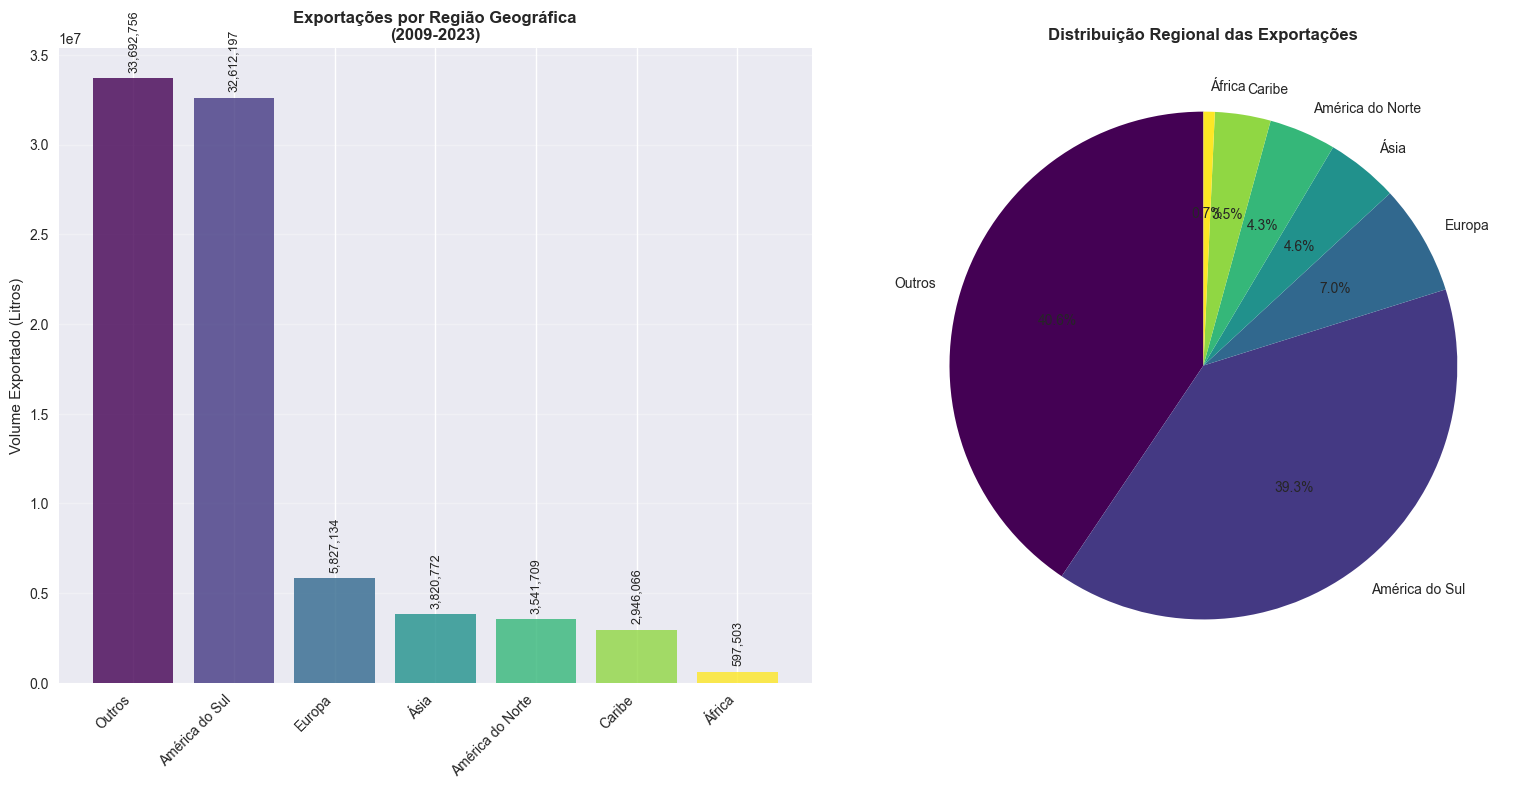

In [14]:
# Visualização da análise regional
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico de barras por região
regioes_plot = analise_regional.head(7)  # Top 7 regiões
bars = ax1.bar(range(len(regioes_plot)), regioes_plot['Total_Litros'], 
               color=plt.cm.viridis(np.linspace(0, 1, len(regioes_plot))), alpha=0.8)
ax1.set_xticks(range(len(regioes_plot)))
ax1.set_xticklabels(regioes_plot.index, rotation=45, ha='right')
ax1.set_ylabel('Volume Exportado (Litros)')
ax1.set_title('Exportações por Região Geográfica\n(2009-2023)', fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

# Adicionar valores nas barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + max(regioes_plot['Total_Litros'])*0.01,
             f'{height:,.0f}', ha='center', va='bottom', fontsize=9, rotation=90)

# Gráfico de pizza das regiões
wedges, texts, autotexts = ax2.pie(regioes_plot['Total_Litros'], 
                                   labels=regioes_plot.index,
                                   autopct='%1.1f%%',
                                   startangle=90,
                                   colors=plt.cm.viridis(np.linspace(0, 1, len(regioes_plot))))
ax2.set_title('Distribuição Regional das Exportações', fontweight='bold')

plt.tight_layout()
plt.show()

## 7. Fatores Externos que Afetam as Exportações

### 7.1 Análise de Correlações com Eventos Econômicos

In [15]:
# Análise de eventos que podem ter impactado as exportações
eventos_importantes = {
    2008: "Crise Financeira Global",
    2010: "Recuperação Econômica", 
    2014: "Início da Recessão Brasileira",
    2016: "Pior Ano da Recessão",
    2018: "Recuperação Gradual",
    2020: "Pandemia COVID-19",
    2022: "Guerra Ucrânia-Rússia"
}

# Calcular variações anuais
df_temporal['Variacao_Anual'] = df_temporal['Total_Exportado_Litros'].pct_change() * 100

print("IMPACTO DE EVENTOS ECONÔMICOS NAS EXPORTAÇÕES")
print("=" * 55)
print(f"{'Ano':<6} {'Volume (L)':<15} {'Variação %':<12} {'Evento':<25}")
print("-" * 70)

for _, row in df_temporal.iterrows():
    ano = int(row['Ano'])
    volume = row['Total_Exportado_Litros']
    variacao = row['Variacao_Anual']
    evento = eventos_importantes.get(ano, "")
    
    variacao_str = f"{variacao:+.1f}%" if not pd.isna(variacao) else "N/A"
    print(f"{ano:<6} {volume:>12,.0f} {variacao_str:>10} {evento:<25}")

# Identificar anos de maior crescimento e declínio
maior_crescimento = df_temporal.loc[df_temporal['Variacao_Anual'].idxmax()]
maior_declinio = df_temporal.loc[df_temporal['Variacao_Anual'].idxmin()]

print(f"\nMAIOR CRESCIMENTO: {int(maior_crescimento['Ano'])} (+{maior_crescimento['Variacao_Anual']:.1f}%)")
print(f"MAIOR DECLÍNIO: {int(maior_declinio['Ano'])} ({maior_declinio['Variacao_Anual']:.1f}%)")

IMPACTO DE EVENTOS ECONÔMICOS NAS EXPORTAÇÕES
Ano    Volume (L)      Variação %   Evento                   
----------------------------------------------------------------------
2009     25,514,198        N/A                          
2010      1,280,574     -95.0% Recuperação Econômica    
2011      1,214,834      -5.1%                          
2012      5,775,376    +375.4%                          
2013      9,149,059     +58.4%                          
2014      2,324,029     -74.6% Início da Recessão Brasileira
2015      1,198,479     -48.4%                          
2016      1,786,549     +49.1% Pior Ano da Recessão     
2017      2,889,572     +61.7%                          
2018      3,856,162     +33.5% Recuperação Gradual      
2019      3,152,873     -18.2%                          
2020      4,409,717     +39.9% Pandemia COVID-19        
2021      8,058,673     +82.7%                          
2022      7,023,479     -12.8% Guerra Ucrânia-Rússia    
2023      5,538,888

### 7.2 Fatores Climáticos e de Produção

In [16]:
# Análise de fatores climáticos (baseado em dados históricos conhecidos)
fatores_climaticos = {
    2009: "Ano normal",
    2010: "La Niña - chuvas excessivas no Sul",
    2011: "Seca no Nordeste",
    2012: "Ano favorável",
    2013: "Seca severa no Nordeste",
    2014: "El Niño fraco",
    2015: "El Niño forte - seca no Nordeste",
    2016: "El Niño forte - impactos na produção",
    2017: "La Niña - chuvas no Sul",
    2018: "Ano de transição",
    2019: "Condições normais",
    2020: "La Niña - boa safra",
    2021: "La Niña persistente",
    2022: "La Niña tripla - seca severa",
    2023: "El Niño - chuvas excessivas"
}

print("FATORES CLIMÁTICOS E IMPACTOS NA PRODUÇÃO")
print("=" * 50)
print(f"{'Ano':<6} {'Condição Climática':<35} {'Exp. (L)':<12}")
print("-" * 55)

for _, row in df_temporal.iterrows():
    ano = int(row['Ano'])
    volume = row['Total_Exportado_Litros']
    clima = fatores_climaticos.get(ano, "Dados não disponíveis")
    print(f"{ano:<6} {clima:<35} {volume:>10,.0f}")

print("\nOBSERVAÇÕES IMPORTANTES:")
print("• El Niño: Geralmente causa seca no Nordeste e chuvas no Sul")
print("• La Niña: Causa chuvas no Sul e seca no Nordeste")
print("• Regiões vinícolas: Principalmente Rio Grande do Sul (Serra Gaúcha)")
print("• Impacto: Chuvas excessivas na colheita prejudicam qualidade")

FATORES CLIMÁTICOS E IMPACTOS NA PRODUÇÃO
Ano    Condição Climática                  Exp. (L)    
-------------------------------------------------------
2009   Ano normal                          25,514,198
2010   La Niña - chuvas excessivas no Sul   1,280,574
2011   Seca no Nordeste                     1,214,834
2012   Ano favorável                        5,775,376
2013   Seca severa no Nordeste              9,149,059
2014   El Niño fraco                        2,324,029
2015   El Niño forte - seca no Nordeste     1,198,479
2016   El Niño forte - impactos na produção  1,786,549
2017   La Niña - chuvas no Sul              2,889,572
2018   Ano de transição                     3,856,162
2019   Condições normais                    3,152,873
2020   La Niña - boa safra                  4,409,717
2021   La Niña persistente                  8,058,673
2022   La Niña tripla - seca severa         7,023,479
2023   El Niño - chuvas excessivas          5,538,888

OBSERVAÇÕES IMPORTANTES:
• El Niño

## 8. Prospecções Futuras e Recomendações

In [17]:
# Análise de tendências para projeções futuras
from sklearn.linear_model import LinearRegression
import numpy as np

# Preparar dados para regressão
X = df_temporal['Ano'].values.reshape(-1, 1)
y = df_temporal['Total_Exportado_Litros'].values

# Ajustar modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X, y)

# Fazer projeções para 2024-2028
anos_futuros = np.array(range(2024, 2029)).reshape(-1, 1)
projecoes = modelo.predict(anos_futuros)

# Calcular R² para avaliar qualidade do modelo
r2_score = modelo.score(X, y)

print("PROJEÇÕES PARA OS PRÓXIMOS 5 ANOS")
print("=" * 40)
print(f"Modelo de Regressão Linear (R² = {r2_score:.3f})")
print(f"Tendência: {modelo.coef_[0]:+,.0f} litros/ano")
print()
print(f"{'Ano':<6} {'Projeção (Litros)':<20} {'Crescimento %':<15}")
print("-" * 45)

base_2023 = df_temporal[df_temporal['Ano'] == 2023]['Total_Exportado_Litros'].iloc[0]

for i, ano in enumerate(range(2024, 2029)):
    projecao = projecoes[i]
    crescimento = ((projecao / base_2023) - 1) * 100
    print(f"{ano:<6} {projecao:>15,.0f} {crescimento:>12.1f}%")

# Cenários alternativos
print("\nCENÁRIOS ALTERNATIVOS PARA 2028:")
print("=" * 35)
projecao_2028 = projecoes[-1]
print(f"Cenário Conservador (-20%): {projecao_2028 * 0.8:,.0f} litros")
print(f"Cenário Base (tendência):   {projecao_2028:,.0f} litros")
print(f"Cenário Otimista (+30%):    {projecao_2028 * 1.3:,.0f} litros")

PROJEÇÕES PARA OS PRÓXIMOS 5 ANOS
Modelo de Regressão Linear (R² = 0.056)
Tendência: -320,880 litros/ano

Ano    Projeção (Litros)    Crescimento %  
---------------------------------------------
2024         2,977,791        -46.2%
2025         2,656,911        -52.0%
2026         2,336,032        -57.8%
2027         2,015,152        -63.6%
2028         1,694,272        -69.4%

CENÁRIOS ALTERNATIVOS PARA 2028:
Cenário Conservador (-20%): 1,355,417 litros
Cenário Base (tendência):   1,694,272 litros
Cenário Otimista (+30%):    2,202,553 litros


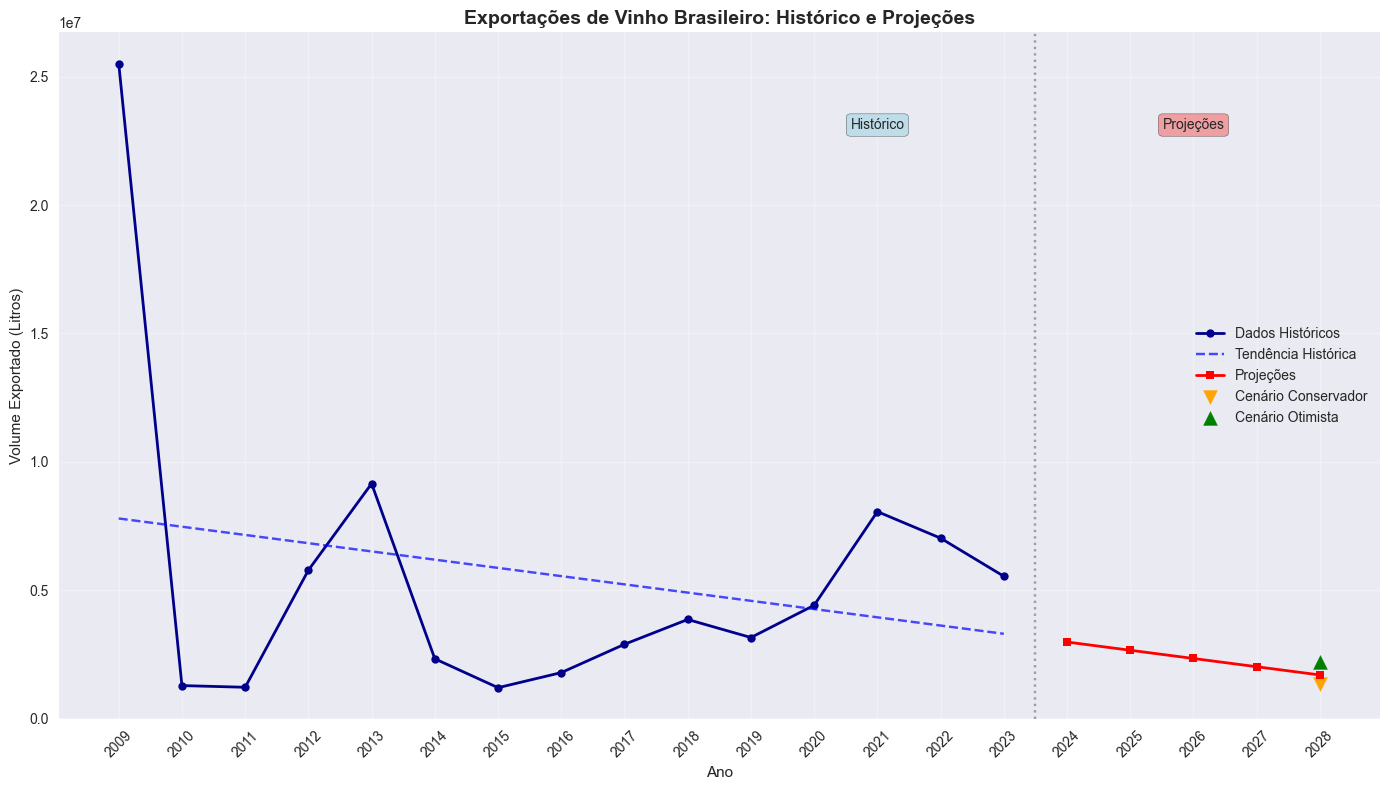

In [18]:
# Visualização das projeções
plt.figure(figsize=(14, 8))

# Dados históricos
plt.plot(df_temporal['Ano'], df_temporal['Total_Exportado_Litros'], 
         'o-', color='darkblue', linewidth=2, markersize=6, label='Dados Históricos')

# Linha de tendência histórica
tendencia_historica = modelo.predict(X)
plt.plot(df_temporal['Ano'], tendencia_historica, 
         '--', color='blue', alpha=0.7, label='Tendência Histórica')

# Projeções futuras
anos_futuros_plot = range(2024, 2029)
plt.plot(anos_futuros_plot, projecoes, 
         's-', color='red', linewidth=2, markersize=6, label='Projeções')

# Cenários alternativos para 2028
plt.scatter([2028], [projecoes[-1] * 0.8], color='orange', s=100, marker='v', label='Cenário Conservador')
plt.scatter([2028], [projecoes[-1] * 1.3], color='green', s=100, marker='^', label='Cenário Otimista')

plt.title('Exportações de Vinho Brasileiro: Histórico e Projeções', fontsize=14, fontweight='bold')
plt.xlabel('Ano')
plt.ylabel('Volume Exportado (Litros)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(list(df_temporal['Ano']) + list(anos_futuros_plot), rotation=45)

# Adicionar linha vertical separando histórico de projeções
plt.axvline(x=2023.5, color='gray', linestyle=':', alpha=0.7)
plt.text(2021, max(df_temporal['Total_Exportado_Litros']) * 0.9, 'Histórico', 
         fontsize=10, ha='center', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
plt.text(2026, max(df_temporal['Total_Exportado_Litros']) * 0.9, 'Projeções', 
         fontsize=10, ha='center', bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7))

plt.tight_layout()
plt.show()

## 9. Recomendações Estratégicas para Melhoria das Exportações

In [19]:
# Análise de oportunidades por mercado
print("RECOMENDAÇÕES ESTRATÉGICAS PARA EXPORTAÇÃO DE VINHOS")
print("=" * 60)
print()

print("1. MERCADOS PRIORITÁRIOS (Baseado no Volume Atual):")
print("-" * 50)
top_5_mercados = df_paises_ativos.head(5)
for i, (_, row) in enumerate(top_5_mercados.iterrows(), 1):
    pais = row['País']
    volume = row['Total_Litros']
    print(f"{i}. {pais}: {volume:,.0f} litros (Manter e expandir)")

print("\n2. MERCADOS EMERGENTES (Potencial de Crescimento):")
print("-" * 50)
# Identificar mercados com crescimento recente
mercados_emergentes = ['China', 'Coreia, Republica Sul', 'Emirados Arabes Unidos', 'Singapura', 'México']
for mercado in mercados_emergentes:
    if mercado in df_paises_ativos['País'].values:
        volume = df_paises_ativos[df_paises_ativos['País'] == mercado]['Total_Litros'].iloc[0]
        print(f"• {mercado}: {volume:,.0f} litros (Investir em marketing)")
    else:
        print(f"• {mercado}: Mercado inexplorado (Oportunidade)")

print("\n3. AÇÕES RECOMENDADAS POR REGIÃO:")
print("-" * 40)
for regiao, dados in analise_regional.head(5).iterrows():
    volume = dados['Total_Litros']
    percentual = dados['Percentual']
    
    if regiao == 'América do Sul':
        acao = "Fortalecer integração regional, acordos comerciais"
    elif regiao == 'América do Norte':
        acao = "Investir em marketing premium, certificações"
    elif regiao == 'Europa':
        acao = "Focar em nichos, vinhos orgânicos e sustentáveis"
    elif regiao == 'Ásia':
        acao = "Adaptar produtos ao paladar local, parcerias"
    else:
        acao = "Explorar oportunidades específicas"
    
    print(f"• {regiao} ({percentual:.1f}%): {acao}")

RECOMENDAÇÕES ESTRATÉGICAS PARA EXPORTAÇÃO DE VINHOS

1. MERCADOS PRIORITÁRIOS (Baseado no Volume Atual):
--------------------------------------------------
1. Rússia: 32,822,141 litros (Manter e expandir)
2. Paraguai: 30,803,247 litros (Manter e expandir)
3. Estados Unidos: 3,349,299 litros (Manter e expandir)
4. China: 2,574,686 litros (Manter e expandir)
5. Haiti: 2,351,228 litros (Manter e expandir)

2. MERCADOS EMERGENTES (Potencial de Crescimento):
--------------------------------------------------
• China: 2,574,686 litros (Investir em marketing)
• Coreia, Republica Sul: 470 litros (Investir em marketing)
• Emirados Arabes Unidos: 16,292 litros (Investir em marketing)
• Singapura: 12,767 litros (Investir em marketing)
• México: 6,329 litros (Investir em marketing)

3. AÇÕES RECOMENDADAS POR REGIÃO:
----------------------------------------
• Outros (40.5%): Explorar oportunidades específicas
• América do Sul (39.2%): Fortalecer integração regional, acordos comerciais
• Europa (7.

In [20]:
print("\n4. ESTRATÉGIAS ESPECÍFICAS DE MELHORIA:")
print("=" * 45)

estrategias = {
    "QUALIDADE E CERTIFICAÇÃO": [
        "• Investir em certificações internacionais (ISO, orgânico)",
        "• Melhorar processos de vinificação e controle de qualidade",
        "• Desenvolver vinhos premium para mercados exigentes",
        "• Participar de concursos internacionais de vinho"
    ],
    "MARKETING E PROMOÇÃO": [
        "• Criar marca Brasil para vinhos (country branding)",
        "• Participar de feiras internacionais especializadas",
        "• Desenvolver marketing digital direcionado",
        "• Parcerias com sommeliers e influenciadores"
    ],
    "LOGÍSTICA E DISTRIBUIÇÃO": [
        "• Otimizar cadeia de suprimentos para exportação",
        "• Reduzir custos de transporte e armazenagem",
        "• Melhorar embalagens para transporte internacional",
        "• Estabelecer centros de distribuição regionais"
    ],
    "POLÍTICAS PÚBLICAS": [
        "• Negociar acordos comerciais favoráveis",
        "• Reduzir barreiras burocráticas à exportação",
        "• Criar incentivos fiscais para exportadores",
        "• Investir em pesquisa e desenvolvimento"
    ]
}

for categoria, acoes in estrategias.items():
    print(f"\n{categoria}:")
    for acao in acoes:
        print(f"  {acao}")

print("\n5. METAS QUANTITATIVAS (2024-2028):")
print("-" * 35)
volume_atual = df_temporal[df_temporal['Ano'] == 2023]['Total_Exportado_Litros'].iloc[0]
meta_2028 = projecoes[-1] * 1.2  # Meta 20% acima da projeção

print(f"• Volume atual (2023): {volume_atual:,.0f} litros")
print(f"• Meta para 2028: {meta_2028:,.0f} litros")
print(f"• Crescimento necessário: {((meta_2028/volume_atual)-1)*100:.1f}%")
print(f"• Crescimento anual médio: {((meta_2028/volume_atual)**(1/5)-1)*100:.1f}%")

print("\n6. INDICADORES DE ACOMPANHAMENTO:")
print("-" * 35)
indicadores = [
    "Volume total exportado (litros/ano)",
    "Valor médio por litro (US$/L)",
    "Número de países importadores ativos",
    "Participação nos top 5 mercados (%)",
    "Crescimento em mercados emergentes (%)",
    "Certificações obtidas (quantidade)",
    "Prêmios internacionais recebidos"
]

for i, indicador in enumerate(indicadores, 1):
    print(f"{i}. {indicador}")


4. ESTRATÉGIAS ESPECÍFICAS DE MELHORIA:

QUALIDADE E CERTIFICAÇÃO:
  • Investir em certificações internacionais (ISO, orgânico)
  • Melhorar processos de vinificação e controle de qualidade
  • Desenvolver vinhos premium para mercados exigentes
  • Participar de concursos internacionais de vinho

MARKETING E PROMOÇÃO:
  • Criar marca Brasil para vinhos (country branding)
  • Participar de feiras internacionais especializadas
  • Desenvolver marketing digital direcionado
  • Parcerias com sommeliers e influenciadores

LOGÍSTICA E DISTRIBUIÇÃO:
  • Otimizar cadeia de suprimentos para exportação
  • Reduzir custos de transporte e armazenagem
  • Melhorar embalagens para transporte internacional
  • Estabelecer centros de distribuição regionais

POLÍTICAS PÚBLICAS:
  • Negociar acordos comerciais favoráveis
  • Reduzir barreiras burocráticas à exportação
  • Criar incentivos fiscais para exportadores
  • Investir em pesquisa e desenvolvimento

5. METAS QUANTITATIVAS (2024-2028):
---------

## 10. Conclusões e Resumo Executivo

In [24]:
# Resumo executivo com principais achados
print("RESUMO EXECUTIVO - EXPORTAÇÕES DE VINHO BRASILEIRO")
print("=" * 60)
print()

# Estatísticas principais
total_15_anos = df_temporal['Total_Exportado_Litros'].sum()
media_anual = df_temporal['Total_Exportado_Litros'].mean()
num_paises = len(df_paises_ativos)
top_3_paises = df_paises_ativos.head(3)['País'].tolist()
concentracao_top3 = (df_paises_ativos.head(3)['Total_Litros'].sum() / total_15_anos) * 100

print("PRINCIPAIS NÚMEROS (2009-2023):")
print("-" * 35)
print(f"Volume total exportado: {total_15_anos:,.0f} litros")
print(f"Média anual: {media_anual:,.0f} litros")
print(f"Países importadores ativos: {num_paises}")
print(f"Top 3 mercados: {', '.join(top_3_paises)}")
print(f"Concentração top 3: {concentracao_top3:.1f}% do total")

print("\nPRINCIPAIS ACHADOS:")
print("-" * 20)
print("Mercado concentrado em poucos países")
print("América do Sul é o principal mercado regional")
print("Volatilidade relacionada a fatores econômicos")
print("Potencial de crescimento em mercados asiáticos")
print("Necessidade de diversificação geográfica")

print("\nFATORES DE RISCO IDENTIFICADOS:")
print("-" * 30)
print("Dependência excessiva de poucos mercados")
print("Impacto de crises econômicas globais")
print("Variações climáticas na produção")
print("Competição com vinhos sul-americanos")
print("Barreiras comerciais e tarifárias")

print("\nOPORTUNIDADES IDENTIFICADAS:")
print("-" * 30)
print("Crescimento do mercado asiático")
print("Demanda por vinhos orgânicos/sustentáveis")
print("Acordos comerciais favoráveis")
print("Melhoria da imagem do vinho brasileiro")
print("Inovação em produtos e processos")

print("\nRECOMENDAÇÃO PRINCIPAL:")
print("-" * 25)
print("Implementar estratégia de diversificação geográfica")
print("focada em qualidade, sustentabilidade e inovação,")
print("com meta de crescimento de 20% até 2028.")

# Salvar resumo em arquivo
with open('resumo_executivo_exportacoes.txt', 'w', encoding='utf-8') as f:
    f.write(f"RESUMO EXECUTIVO - EXPORTAÇÕES DE VINHO BRASILEIRO\n")
    f.write(f"Volume total (2009-2023): {total_15_anos:,.0f} litros\n")
    f.write(f"Países importadores: {num_paises}\n")
    f.write(f"Principais mercados: {', '.join(top_3_paises)}\n")
    f.write(f"Meta 2028: {meta_2028:,.0f} litros\n")

print("\nResumo executivo salvo em 'resumo_executivo_exportacoes.txt'")

RESUMO EXECUTIVO - EXPORTAÇÕES DE VINHO BRASILEIRO

PRINCIPAIS NÚMEROS (2009-2023):
-----------------------------------
Volume total exportado: 83,172,462 litros
Média anual: 5,544,831 litros
Países importadores ativos: 122
Top 3 mercados: Rússia, Paraguai, Estados Unidos
Concentração top 3: 80.5% do total

PRINCIPAIS ACHADOS:
--------------------
Mercado concentrado em poucos países
América do Sul é o principal mercado regional
Volatilidade relacionada a fatores econômicos
Potencial de crescimento em mercados asiáticos
Necessidade de diversificação geográfica

FATORES DE RISCO IDENTIFICADOS:
------------------------------
Dependência excessiva de poucos mercados
Impacto de crises econômicas globais
Variações climáticas na produção
Competição com vinhos sul-americanos
Barreiras comerciais e tarifárias

OPORTUNIDADES IDENTIFICADAS:
------------------------------
Crescimento do mercado asiático
Demanda por vinhos orgânicos/sustentáveis
Acordos comerciais favoráveis
Melhoria da imagem do 

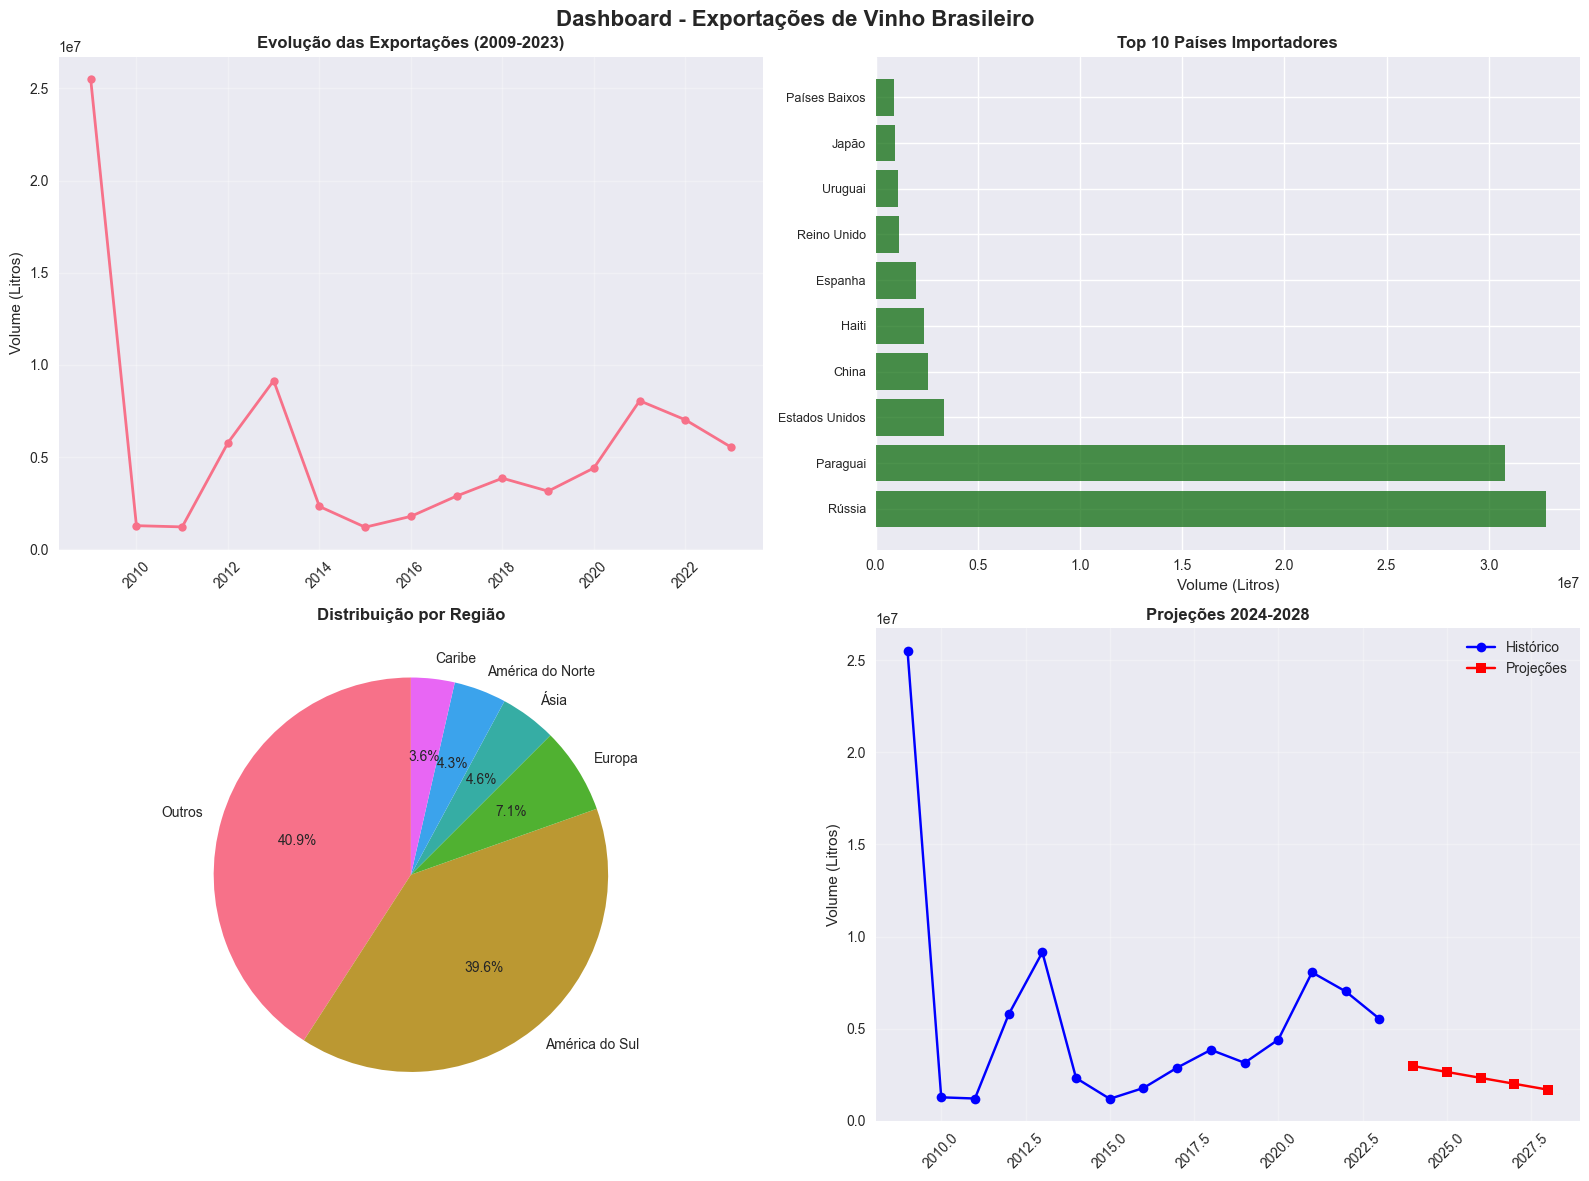


ANÁLISE CONCLUÍDA!

Arquivos gerados:
• tabela_exportacao_vinhos_brasil.csv
• resumo_executivo_exportacoes.txt
• Este notebook com todas as análises


In [23]:
# Dashboard final com métricas principais
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Evolução temporal
ax1.plot(df_temporal['Ano'], df_temporal['Total_Exportado_Litros'], 'o-', linewidth=2, markersize=6)
ax1.set_title('Evolução das Exportações (2009-2023)', fontweight='bold')
ax1.set_ylabel('Volume (Litros)')
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# 2. Top 10 países
top_10_final = df_paises_ativos.head(10)
ax2.barh(range(len(top_10_final)), top_10_final['Total_Litros'], color='darkgreen', alpha=0.7)
ax2.set_yticks(range(len(top_10_final)))
ax2.set_yticklabels(top_10_final['País'], fontsize=9)
ax2.set_title('Top 10 Países Importadores', fontweight='bold')
ax2.set_xlabel('Volume (Litros)')

# 3. Distribuição regional
top_regioes = analise_regional.head(6)
wedges, texts, autotexts = ax3.pie(top_regioes['Total_Litros'], 
                                   labels=top_regioes.index,
                                   autopct='%1.1f%%',
                                   startangle=90)
ax3.set_title('Distribuição por Região', fontweight='bold')

# 4. Projeções futuras
anos_completos = list(df_temporal['Ano']) + list(range(2024, 2029))
volumes_completos = list(df_temporal['Total_Exportado_Litros']) + list(projecoes)
cores = ['blue'] * len(df_temporal) + ['red'] * len(projecoes)

ax4.plot(df_temporal['Ano'], df_temporal['Total_Exportado_Litros'], 'o-', color='blue', label='Histórico')
ax4.plot(range(2024, 2029), projecoes, 's-', color='red', label='Projeções')
ax4.set_title('Projeções 2024-2028', fontweight='bold')
ax4.set_ylabel('Volume (Litros)')
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.tick_params(axis='x', rotation=45)

plt.suptitle('Dashboard - Exportações de Vinho Brasileiro', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

print("\nANÁLISE CONCLUÍDA!")
print("\nArquivos gerados:")
print("• tabela_exportacao_vinhos_brasil.csv")
print("• resumo_executivo_exportacoes.txt")
print("• Este notebook com todas as análises")